In [1]:
import requests # 웹 페이지 소스를 얻기 위한 패키지(기본 내장 패키지이다.)
from bs4 import BeautifulSoup # 웹 페이지 소스를 얻기 위한 패키지, 더 간단히 얻을 수 있다는 장점이 있다고 한다.
from datetime import datetime                                # (!pip install beautifulsoup4 으로 다운받을 수 있다.)
import pandas as pd # 데이터를 처리하기 위한 가장 기본적인 패키지
import time # 사이트를 불러올 때, 작업 지연시간을 지정해주기 위한 패키지이다. (사이트가 늦게 켜지면 에러가 발생하기 때문)
import urllib.request #
from selenium.webdriver import Chrome
import json
import re     
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import FinanceDataReader as fdr
from datetime import date
import seaborn as sns

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Standard plotly imports
#import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import iplot, init_notebook_mode
#import cufflinks
#import cufflinks as cf
import plotly.figure_factory as ff

# Using plotly + cufflinks in offline mode
init_notebook_mode(connected=True)
#cufflinks.go_offline(connected=True)

# Preprocessing, modelling and evaluating
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from xgboost import XGBClassifier
import xgboost as xgb

from sklearn.preprocessing import minmax_scale
from sklearn.decomposition import PCA

from sklearn.model_selection import KFold,TimeSeriesSplit
from sklearn.metrics import roc_auc_score
from xgboost import plot_importance
from sklearn.metrics import make_scorer

import os
import gc

## Hyperopt modules
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK, STATUS_RUNNING
from functools import partial
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from sklearn.metrics import roc_auc_score
import gc

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings

In [4]:
plt.style.use('ggplot') #ggplot스타일 사용
#한글폰트
plt.rc('font', family='nanumgothic')
plt.rc('axes', unicode_minus=False)

In [4]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

## Function to reduce the DF size
'''dtype에따라서 낮은 메모리로 변경'''
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

def CalcOutliers(df_num): 

    # calculating mean and std of the array
    data_mean, data_std = np.mean(df_num), np.std(df_num)

    # seting the cut line to both higher and lower values
    # You can change this value
    cut = data_std * 3

    #Calculating the higher and lower cut values
    lower, upper = data_mean - cut, data_mean + cut

    # creating an array of lower, higher and total outlier values 
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    # array without outlier values
    outliers_removed = [x for x in df_num if x > lower and x < upper]
    
    print('Identified lowest outliers: %d' % len(outliers_lower)) # printing total number of values in lower cut of outliers
    print('Identified upper outliers: %d' % len(outliers_higher)) # printing total number of values in higher cut of outliers
    print('Total outlier observations: %d' % len(outliers_total)) # printing total number of values outliers of both sides
    print('Non-outlier observations: %d' % len(outliers_removed)) # printing total number of non outlier values
    print("Total percentual of Outliers: ", round((len(outliers_total) / len(outliers_removed) )*100, 4)) # Percentual of outliers in points
    
    return

- TransactionID - 결제 및 거래 id
- id01-id11 , id13-id14, id17-id22,id24-id26, id32- float변수로서 어떤 특징의 지수를 나타내는 듯?
- 나머지id - categorical변수 , 특징에 대한 factor변수
- device_info - 해당 디바이스의 운영체제를 뜻하는 듯
- device_type - desktop / mobile

- v1 - v339  - vesta데이터 여러 암호화된 정보를 담고 있음
- c - counting데이터
- d - timedelta 데이터, 이전 결제와의 날짜 간격
- m - match데이터로서 카드의 이름, 주소의 이름에 대한 match값
- card - bank country, issue bank / (c4/c6)categorical 데이터
    - card1
    - card2
    - card3
    - card4 : 카드종류
    - card5
    - card6 : 카드 거래 유형
- transactionamt - 거래에서의 지불 금액 (달러기준)
- addr1 / addr2 - 고객의 주소 코드 / categorical 데이터
- productCD - 각 결제에 대한 상품 코드 / categorical 데이터

- Target predict = isFraud (multi classification) - 온라인거래가 사기인지 아닌지 탐색
- TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
- TransactionAMT: transaction payment amount in USD
- ProductCD: product code, the product for each transaction
- card1 - card6: payment card information, such as card type, card category, issue bank,country, etc.
- addr: address
- dist: distance
- P_ and (R__) emaildomain: purchaser and recipient email domain
- C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
- D1-D15: timedelta, such as days between previous transaction, etc.
- M1-M9: match, such as names on card and address, etc.
- Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.


- Categorical Features:
    - ProductCD
    - card1 - card6
    - addr1, addr2
    - Pemaildomain Remaildomain
    - M1 - M9

---
# 데이터 불러오기
---

In [13]:
debug = True
row = 30000 if debug else None#10%만 샘플을 뽑아서 사용

In [3]:
'''train_data만 불러오기
nrows=row'''
df_id = pd.read_csv('./ieee데이터셋/train_identity.csv')
df_trans = pd.read_csv('./ieee데이터셋/train_transaction.csv')

In [5]:
train_identity = pd.read_csv('train_identity.csv')
train_transaction = pd.read_csv('train_transaction.csv')

In [27]:
'''test_data불러오기'''
df_test_id = pd.read_csv('./ieee데이터셋/test_identity.csv')
df_test_trans = pd.read_csv('./ieee데이터셋/test_transaction.csv')

In [6]:
test_identity = pd.read_csv('test_identity.csv')
test_transaction = pd.read_csv('test_transaction.csv')

In [14]:
'''subsample data'''
sample_submission = pd.read_csv('./ieee데이터셋/sample_submission.csv', index_col='TransactionID')

In [7]:
sub = pd.read_csv('sample_submission.csv', index_col='TransactionID')

In [6]:
'''REducing memory'''
df_trans = reduce_mem_usage(df_trans)
df_id = reduce_mem_usage(df_id)

Mem. usage decreased to 542.35 Mb (69.4% reduction)
Mem. usage decreased to 25.86 Mb (42.7% reduction)


In [ ]:
'''iden, tran 데이터를 transaction_id 기준으로 병합'''
mer = pd.merge(tran,iden,on='TransactionID',how='left' )

In [27]:
mer['isFraud'].value_counts()

0    29140
1      860
Name: isFraud, dtype: int64

---
# 데이터 탐색
---

In [11]:
train_transaction.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [13]:
len(train_identity)

144233

In [33]:
train_transaction.dtypes[2:10]

TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card1               int64
card2             float64
card3             float64
card4              object
card5             float64
dtype: object

In [53]:
np.where(train_transaction['D9'].isna(),1,0)

array([1, 1, 1, ..., 1, 1, 1])

In [6]:
df = train_transaction[train_transaction.columns[55:].tolist()].isna().astype(int)

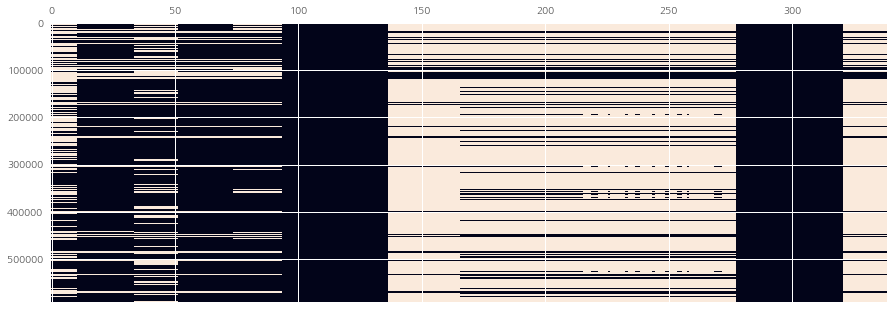

In [8]:
plt.figure(figsize=(15,5))
plt.matshow(df,fignum=1)
plt.gca().set_aspect('auto')
plt.show()

In [ ]:
df = train['V1'].isna().astype(int)
plt.figure(figsize=(15,5))
plt.matshow(df,fignum=1)
plt.gca().set_aspect('auto')
plt.show()

In [65]:
train_transaction['V3'].value_counts(dropna=False)

1.0    290583
NaN    279287
2.0     17763
3.0      2335
4.0       403
5.0        93
6.0        34
0.0        20
7.0        18
8.0         3
9.0         1
Name: V3, dtype: int64

In [10]:
train_identity.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [30]:
'''null존재하는 columns'''
mer.isnull().any().sum()

359

In [39]:
'''변수별 데이터타입'''
mer.dtypes.value_counts()

float64    399
object      31
int64        4
dtype: int64

In [49]:
mer.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
id_36              object
id_37              object
id_38              object
DeviceType         object
DeviceInfo         object
Length: 434, dtype: object

---
### EDA
---
단일 알파벳 변수들을 제외하고 card, dist변수별 분포에 따라서 해당 거래가 사기인지 아닌지 판별하는 시각화 구하기

C:\Users\tlsal\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\tlsal\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


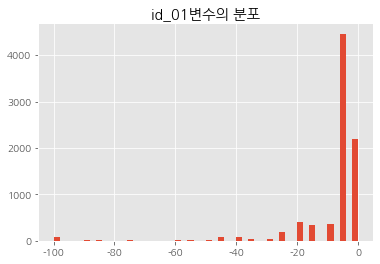

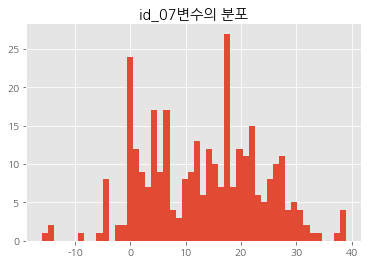

In [61]:
'''히스토그램으로 id변수들의 분포 파악'''
def id_hist(data,column):
    plt.hist(data[column],bins=50)
    plt.title(column+'변수의 분포')
    plt.show()

id_hist(mer,'id_01')
id_hist(mer,'id_07')

---
### categorical feature eda
---

In [76]:
'''altair templates issue / object변수 count에서 사용하기 적절
여러 변수에 대한 시각화를 한눈에 볼 수 있게끔 만들어주는 라이브러리이기 때문에 데이터를 탐색하고 
유의미한 변수를 뽑아내고 분석하기에 적절'''
import altair as alt
from django.shortcuts import render
charts = {}
for i in ['id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']:
    feature_count = mer[i].value_counts(dropna=False).reset_index().rename(columns={i: 'count', 'index': i})
    chart = alt.Chart(feature_count).mark_bar().encode(
                y=alt.Y(f"{i}:N", axis=alt.Axis(title=i)),
                x=alt.X('count:Q', axis=alt.Axis(title='Count')),
                tooltip=[i, 'count']
            ).properties(title=f"Counts of {i}", width=400)
    charts[i] = chart                         
    
render((charts['id_12'] | charts['id_15'] | charts['id_16']) & (charts['id_28'] | charts['id_29'] | charts['id_32']) & (charts['id_34'] | charts['id_35'] | charts['id_36']) & (charts['id_37'] | charts['id_38']),template_name)

NameError: name 'template_name' is not defined

In [198]:
'''altair로 안뽑아지니 직접 함수 작성'''
'''1. id_n : object인 것만 count'''
def id_object(data,column):
    idx0 = data[column].value_counts(dropna=False).index
    idx = data[column].value_counts().index.tolist()
    value = data[column].value_counts(dropna=False).values
    
    if math.isnan(idx0.tolist()[0]) == True:
        idx = ['nan'] + idx
        
    idx2 = []
    for i in idx:
        idx2.append(str(i))
        
    plt.barh(idx2,value)
    plt.title(column + '변수 빈도수')
    plt.show()

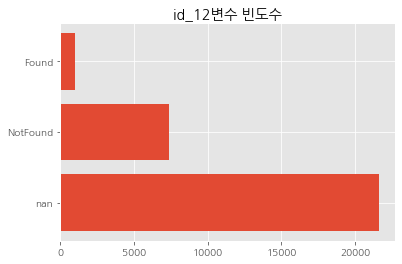

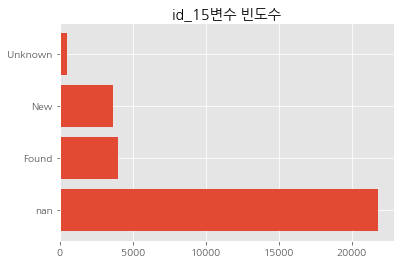

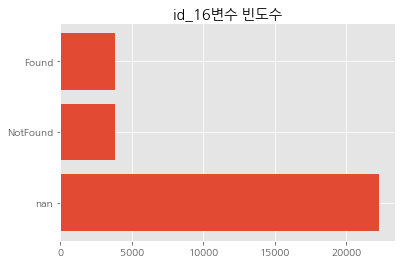

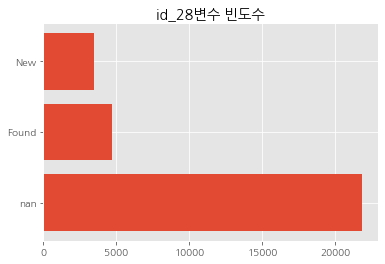

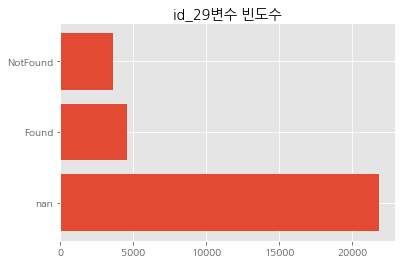

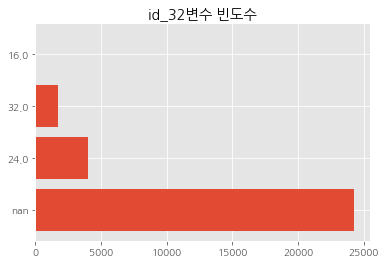

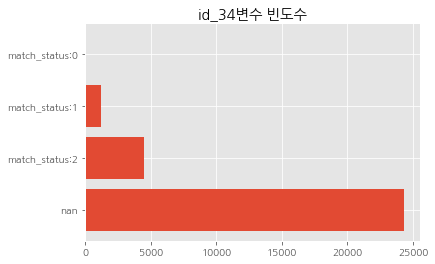

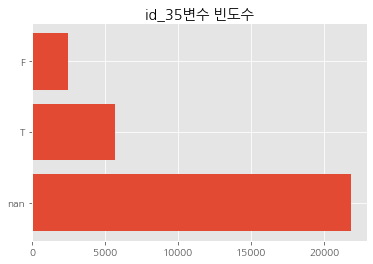

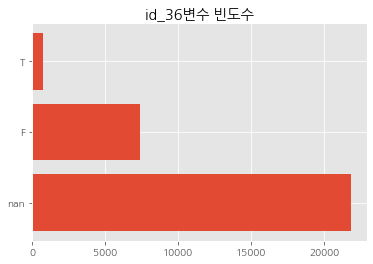

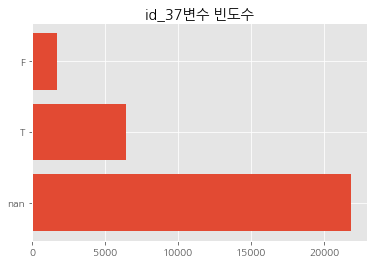

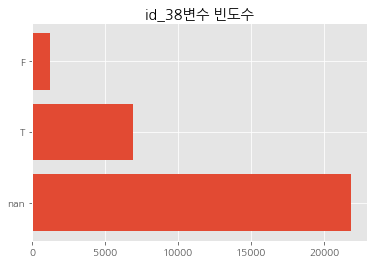

In [199]:
for col in ['id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_32', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']:
    id_object(mer,col)

In [205]:
'''값의 개수가 많은 변수의 시각화'''
def id_object2(data,column):
    idx0 = data[column].value_counts(dropna=False).index
    idx = data[column].value_counts().index.tolist()
    value = data[column].value_counts(dropna=False).values
    
    if math.isnan(idx0.tolist()[0]) == True:
        idx = ['nan'] + idx
        
    idx2 = []
    for i in idx:
        idx2.append(str(i))
        
    plt.figure(figsize=(12,8))
    plt.bar(idx2,value)
    plt.xticks(rotation=90,size=8)
    plt.title(column + '변수 빈도수')
    plt.show()

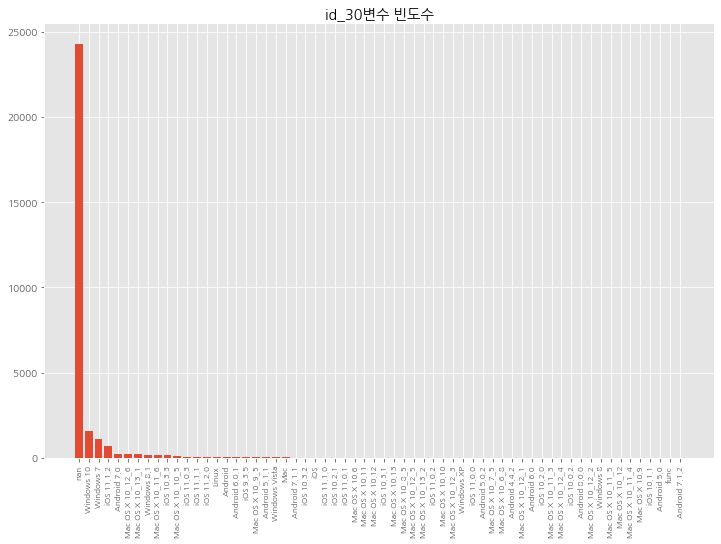

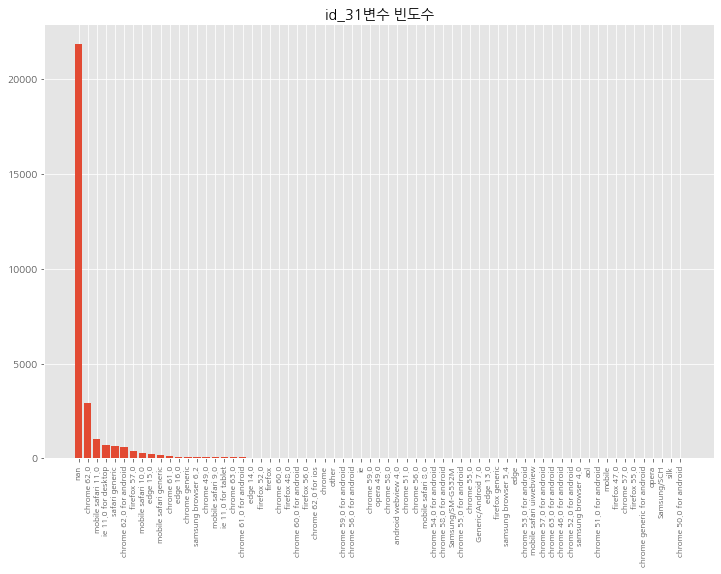

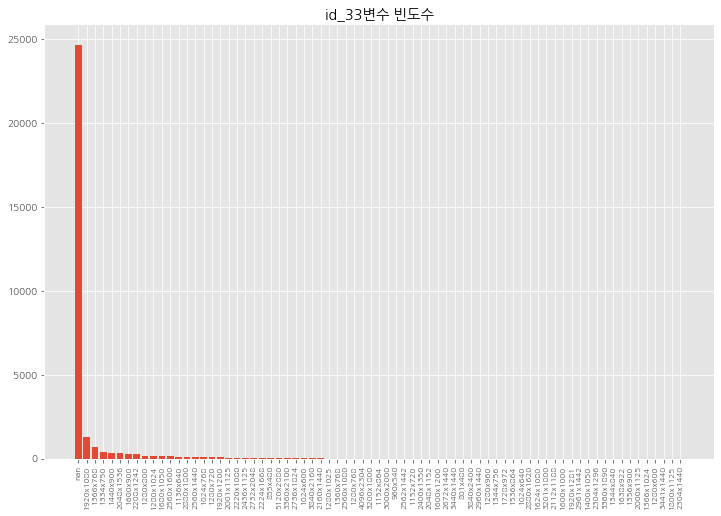

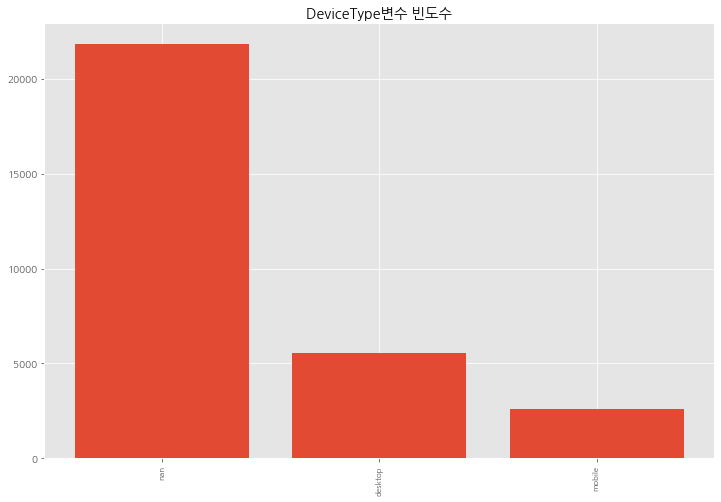

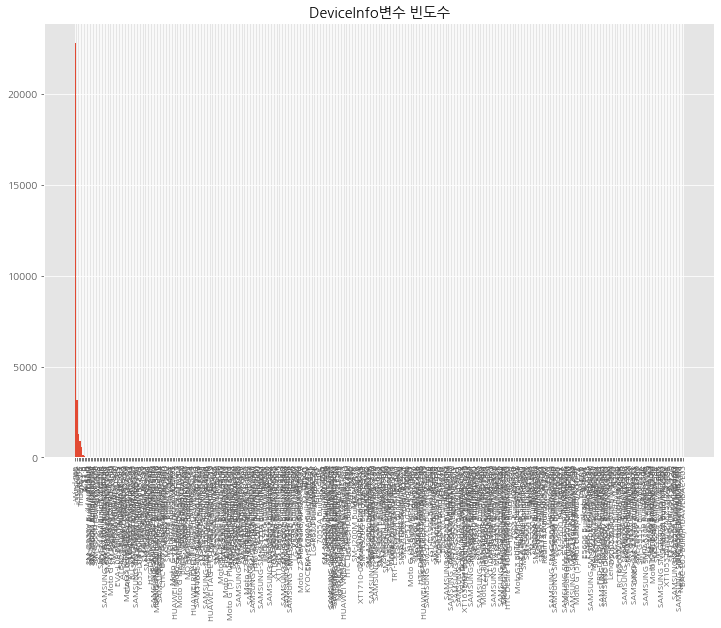

In [206]:
for col in ['id_30', 'id_31', 'id_33', 'DeviceType', 'DeviceInfo']:
    id_object2(mer,col)

In [208]:
for col in ['ProductCD', 'card4', 'card6', 'M4', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9']:
    id_object(mer,col)

TypeError: must be real number, not str

In [ ]:
'''각 categorical 변수별로 데이터의 수를 확인한 다음 
대출을 상환하는 것에 대한 대출을 상환하지 않을 비율을 구해서 각각 비교해준다'''
'''['id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_32', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']:'''
inte_ratio = pd.DataFrame()
for i in range(len(inte)):
    inte_ls = inte['inte_data'].iloc[i]
    
    return_not_rate = []
    ls_nm = []
    col_nm = []
    count_nm = []
    for j in range(len(inte_ls)):
        target = train_df[train_df[inte['var_nm'].iloc[i]]==inte_ls[j]]
        
        ls_nm.append(inte_ls[j])
        col_nm.append(inte['var_nm'].iloc[i])
        try:
            return_not_rate.append(len(target[target['TARGET']==1])/len(target[target['TARGET']==0]))
        except:
            return_not_rate.append(0)
            
        count_nm.append(len(target))
    
    inte_ratio0 = pd.DataFrame()
    inte_ratio0['col_nm'] = col_nm
    inte_ratio0['ls_nm'] = ls_nm
    inte_ratio0['return_not_rate'] = return_not_rate
    inte_ratio0['count_value'] = count_nm
    
    inte_ratio = inte_ratio.append(inte_ratio0)
    
inte_ratio2 = inte_ratio.sort_values(['col_nm','count_value'],ascending=False)

In [ ]:
def visual_code_inte2(variable):
    global inte_ratio2,train_transaction
    
    data = inte_ratio2
    col_df = data[data['col_nm']==variable]
    col_df = col_df.sort_values('return_not_rate',ascending=False)
    
    label = col_df['ls_nm'].tolist()
    x = np.arange(len(label))
    
    return_not_rate = col_df['return_not_rate'].tolist()
    count_value = col_df['count_value'].tolist()
    
    plt.figure(figsize=(12,8))
    plt.bar(x,return_not_rate,color = 'rgbkymc')
    plt.xticks(x,label,rotation=90,fontsize=12)
    plt.ylim(0,return_not_rate[0]+0.1)
    plt.xlabel(variable)
    plt.ylabel('비율')
    plt.title(variable+'변수의 대출상환을 하지 못할 비율')
    
    for i,v in enumerate(count_value):
        plt.text(i-0.4,return_not_rate[i]+0.01,str(v),color='black',fontweight='bold',size=15)
    plt.show()
    print(str(col_df[col_df['count_value']==col_df['count_value'].max()]['ls_nm'].iloc[0])+'범주가 빈도수는 가장 높지만\n\n'+'범주중에 '+str(col_df[col_df['return_not_rate']==col_df['return_not_rate'].max()]['ls_nm'].iloc[0])+
     ' 범주가 대출을 상환 하지 못할 비율이 더 높습니다.')

---
### float feature eda
---

In [111]:
train_transaction.loc[:,['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2']].describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,238269.000000,37627.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,118.502180,231.855423
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,371.872026,529.053494
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,3.000000,7.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,8.000000,37.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,24.000000,206.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,10286.000000,11623.000000


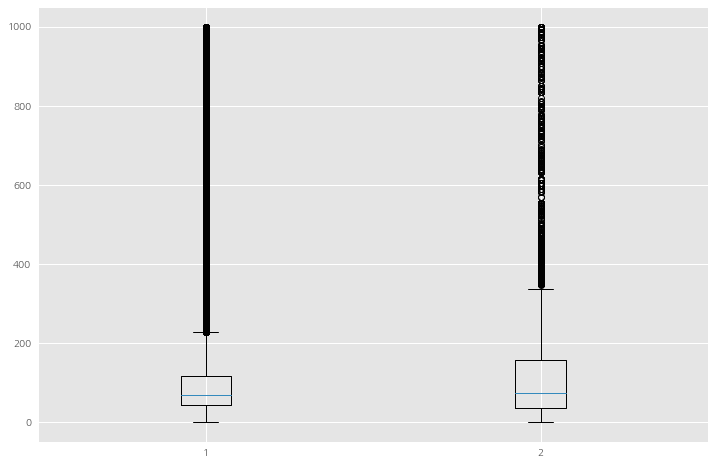

In [113]:
tran0 = train_transaction[(train_transaction['isFraud']==0) & (train_transaction['TransactionAmt']<=1000)]
tran1 = train_transaction[(train_transaction['isFraud']==1)& (train_transaction['TransactionAmt']<=1000)]
amt0 = tran0['TransactionAmt'].tolist()
amt1 = tran1['TransactionAmt'].tolist()

plt.figure(figsize=(12,8))
plt.boxplot((amt0,amt1))
plt.show()

In [115]:
def float_boxplot(variable,df = train_transaction):
    plt.figure(figsize=(12,8))
    sns.boxplot(x = 'isFraud',
               y = variable,
               data= df)
    plt.show()

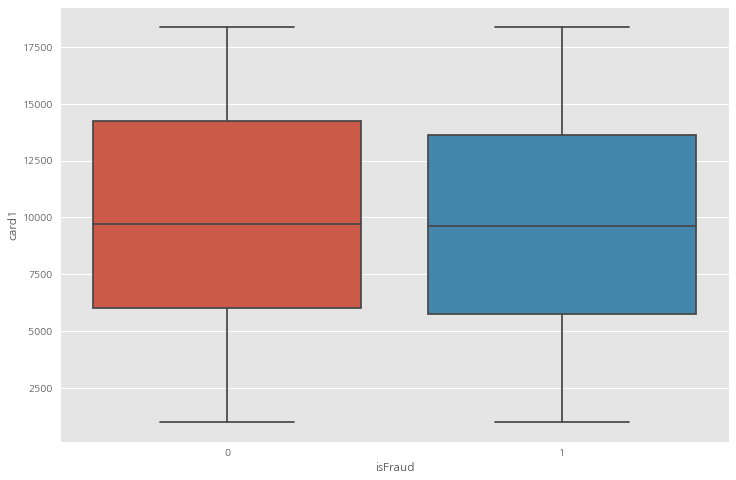

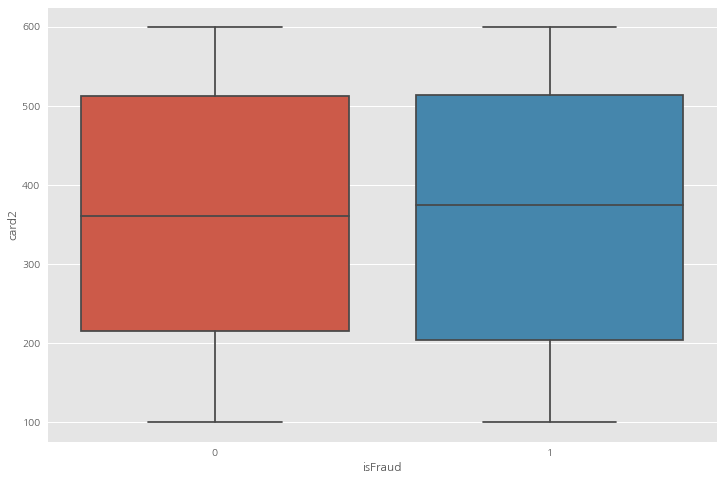

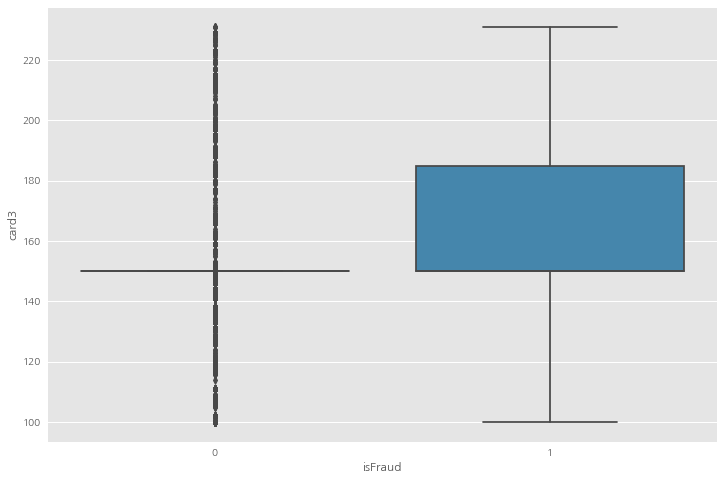

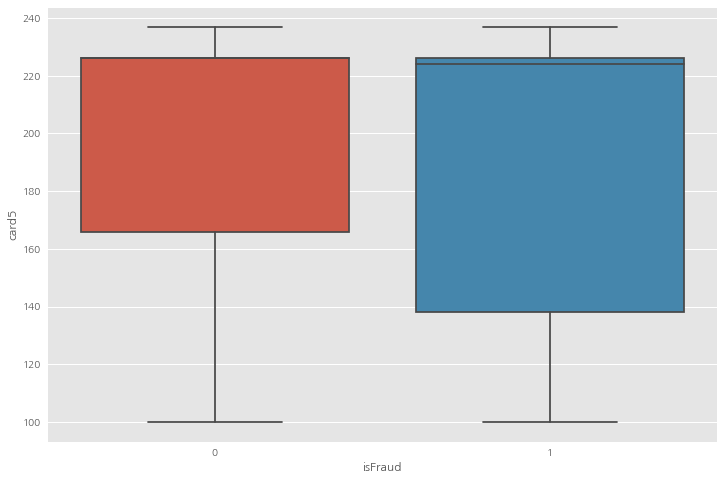

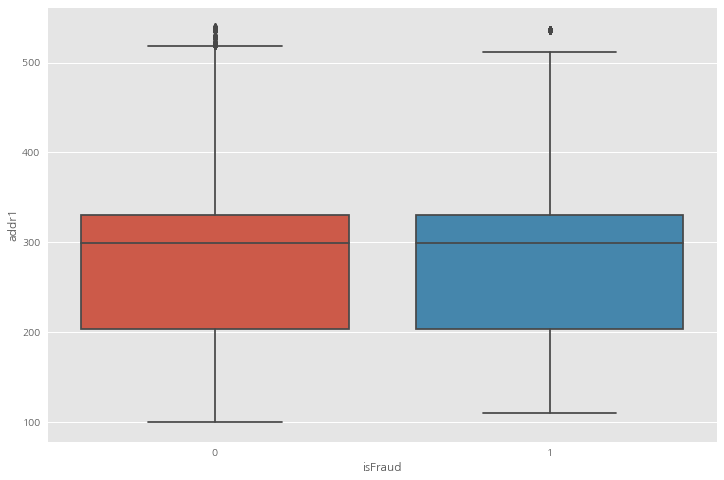

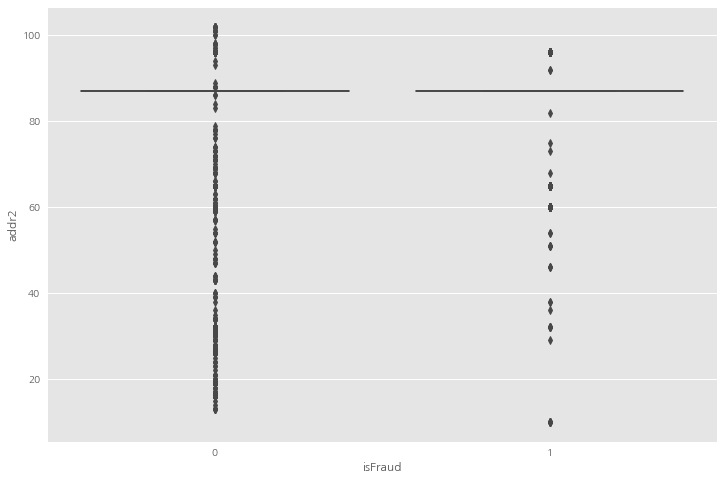

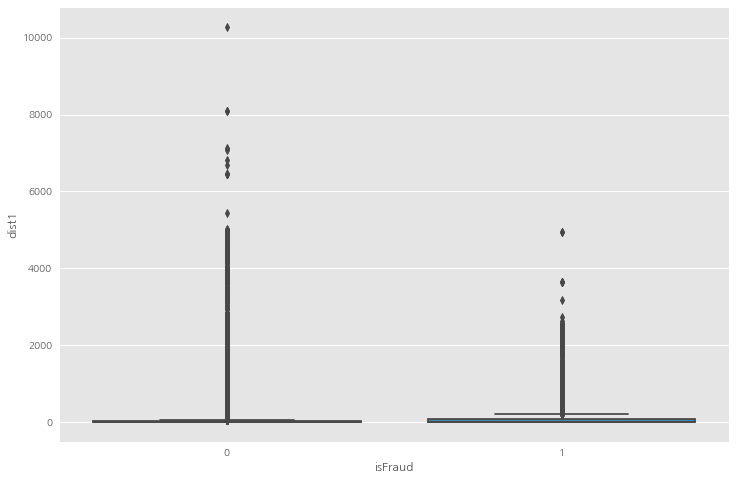

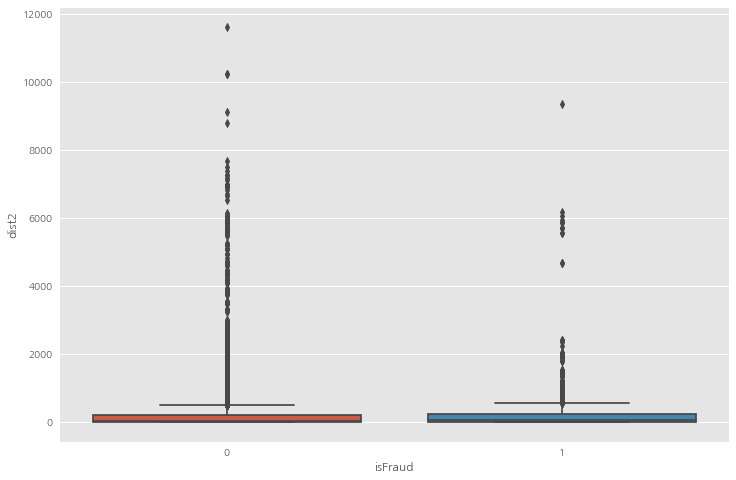

In [116]:
'''+- 2sd를 제거 or 상위 5%제거한 데이터로 다시 해볼 것'''
for i in ['card1','card2','card3','card5', 'addr1', 'addr2', 'dist1','dist2']:
    float_boxplot(i)

In [117]:
def kde_target(variable):
    global train_transaction
    
    cor = train_transaction['isFraud'].corr(train_transaction[variable])
    
    # 대출을 상환한 사람과 상환하지 않은 사람의 중앙값 계산
    
    avg_repaid = train_transaction.ix[train_transaction['isFraud']==0,variable].median()
    avg_not_repaid = train_transaction.ix[train_transaction['isFraud']==1,variable].median()
    
    plt.figure(figsize=(12,8))
    
    #커널 밀도 그래프 
    sns.kdeplot(train_transaction.ix[train_transaction['isFraud']==0,variable],label = 'TARGET == 0')
    sns.kdeplot(train_transaction.ix[train_transaction['isFraud']==1,variable],label = 'TARGET == 1')
    
    plt.xlabel(variable); plt.ylabel('Density'); plt.title('%s Distribution' % variable)
    plt.legend();
    plt.show()
    
    # 상관계수 출력
    # print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (variable, cor))
    
    # 중간값 출력
    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid =     %0.4f' % avg_repaid)


C:\Users\tlsal\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

C:\Users\tlsal\Anaconda3\lib\site-packages\pandas\core\indexing.py:947: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

C:\Users\tlsal\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

C:\Users\tlsal\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning:


.ix 

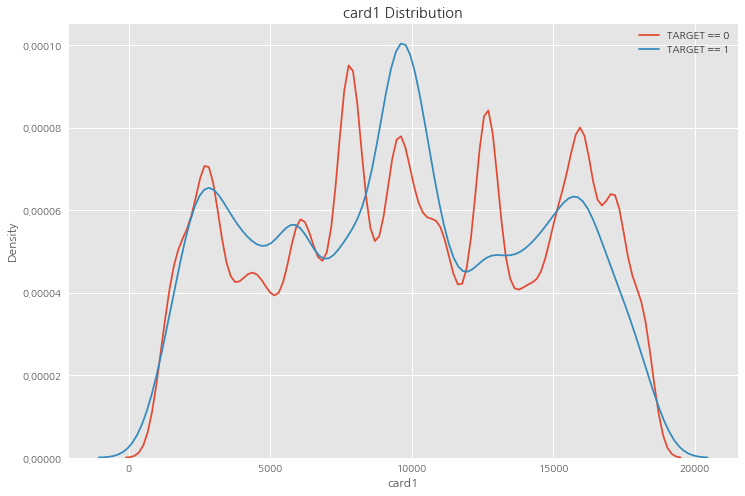

The correlation between card1 and the TARGET is -0.0136
Median value for loan that was not repaid = 9633.0000
Median value for loan that was repaid =     9711.0000


C:\Users\tlsal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning:

invalid value encountered in greater

C:\Users\tlsal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning:

invalid value encountered in less



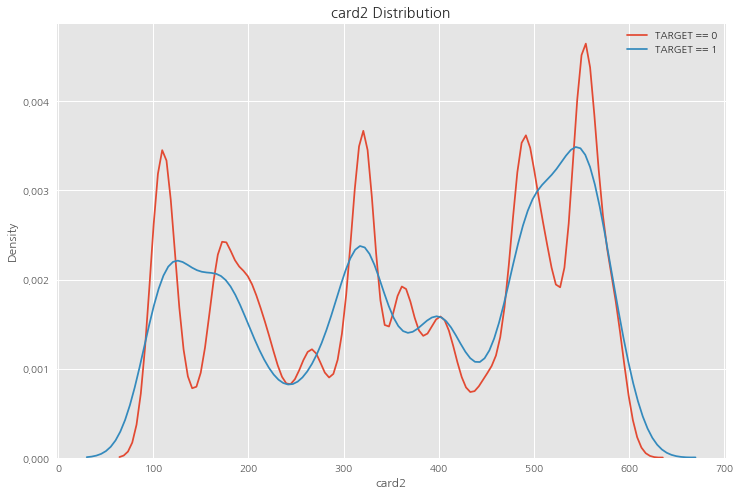

The correlation between card2 and the TARGET is 0.0034
Median value for loan that was not repaid = 375.0000
Median value for loan that was repaid =     361.0000


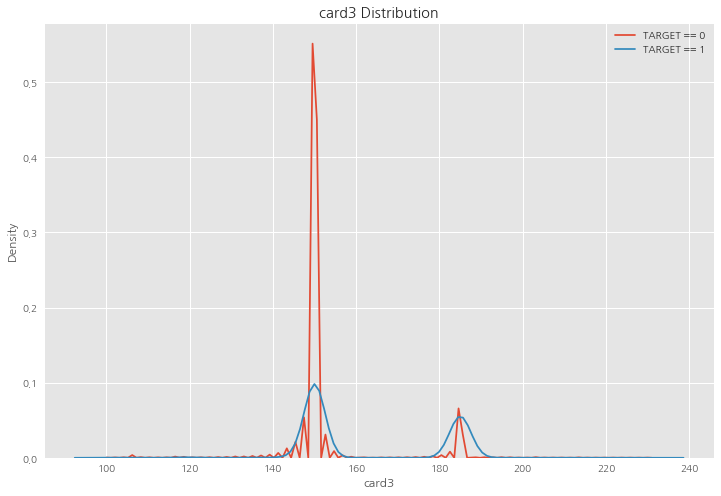

The correlation between card3 and the TARGET is 0.1542
Median value for loan that was not repaid = 150.0000
Median value for loan that was repaid =     150.0000


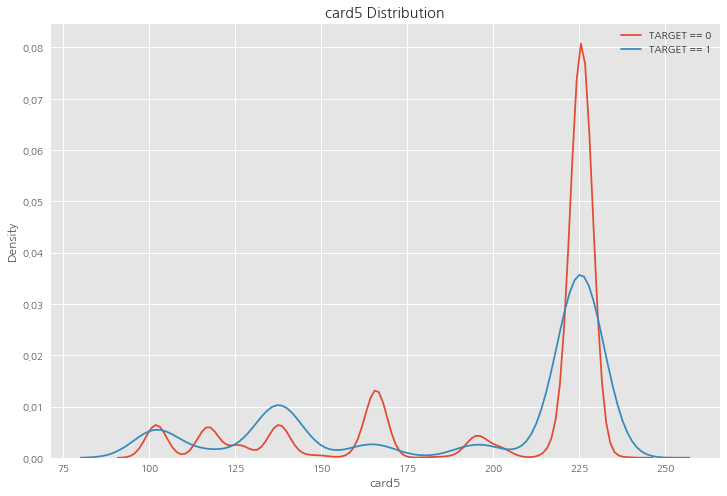

The correlation between card5 and the TARGET is -0.0336
Median value for loan that was not repaid = 224.0000
Median value for loan that was repaid =     226.0000


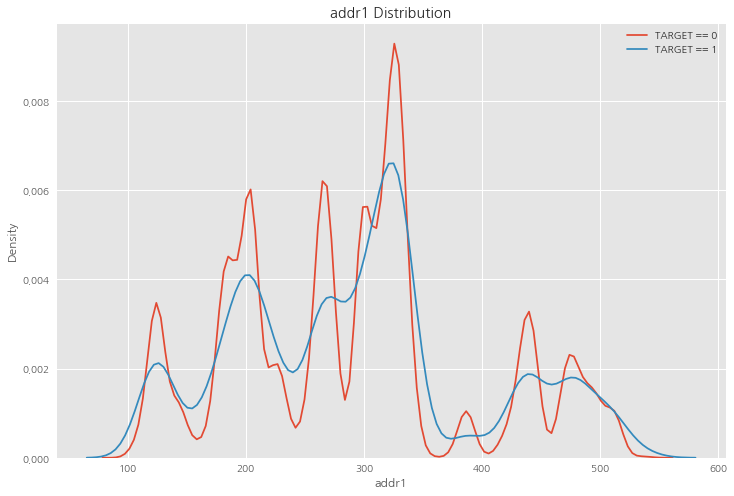

The correlation between addr1 and the TARGET is 0.0056
Median value for loan that was not repaid = 299.0000
Median value for loan that was repaid =     299.0000


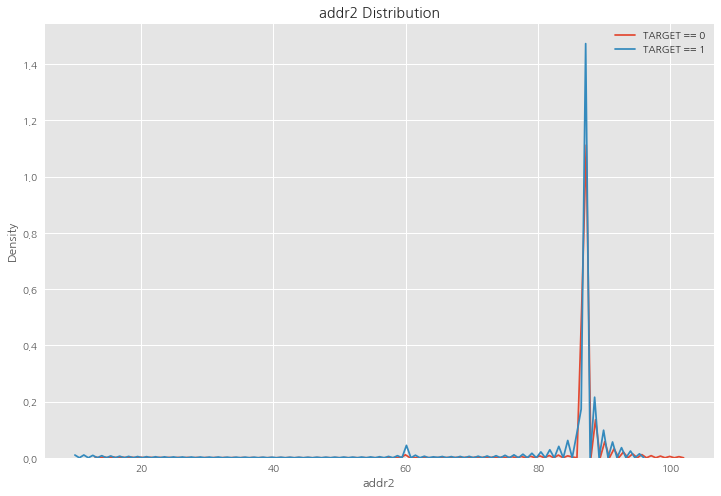

The correlation between addr2 and the TARGET is -0.0304
Median value for loan that was not repaid = 87.0000
Median value for loan that was repaid =     87.0000


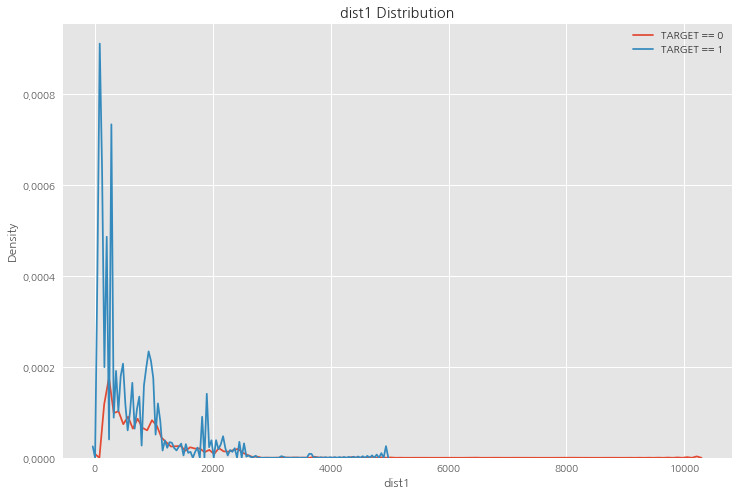

The correlation between dist1 and the TARGET is 0.0215
Median value for loan that was not repaid = 10.0000
Median value for loan that was repaid =     8.0000


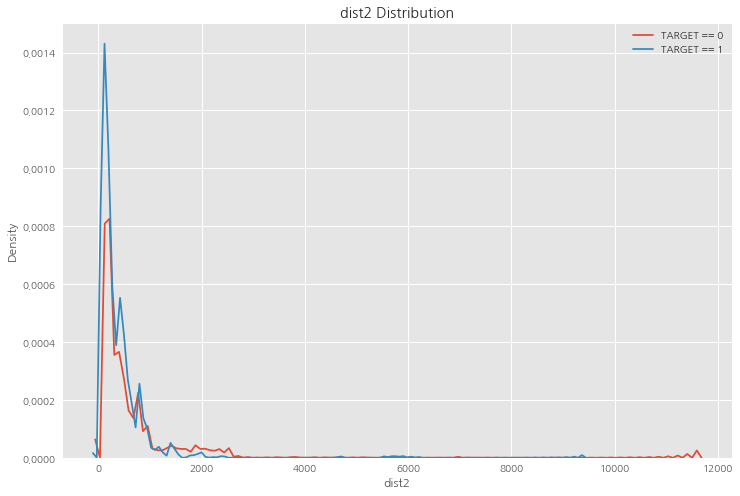

The correlation between dist2 and the TARGET is -0.0191
Median value for loan that was not repaid = 49.0000
Median value for loan that was repaid =     36.0000


In [118]:
'''1. 이상치 제거하고난 뒤 다시 그리기
2. 그래프별 해석하기
해당 커널밀도함수는 잘못 시각화 한 것 밑의 변수들이 연속형 변수가 아님'''
for i in ['card1','card2','card3','card5', 'addr1', 'addr2', 'dist1','dist2']:
    kde_target(i)

In [ ]:
'''card data eda'''

---
# feature engineering
---

In [119]:
train_identity['']

0              SAMSUNG SM-G892A Build/NRD90M
1                                 iOS Device
2                                    Windows
3                                        NaN
4                                      MacOS
                         ...                
144228               F3111 Build/33.3.A.1.97
144229                   A574BL Build/NMF26F
144230    Moto E (4) Plus Build/NMA26.42-152
144231                                 MacOS
144232           RNE-L03 Build/HUAWEIRNE-L03
Name: DeviceInfo, Length: 144233, dtype: object

In [9]:
def id_split(dataframe):
    dataframe['device_name'] = dataframe['DeviceInfo'].str.split('/', expand=True)[0]
    dataframe['device_version'] = dataframe['DeviceInfo'].str.split('/', expand=True)[1]

    dataframe['OS_id_30'] = dataframe['id_30'].str.split(' ', expand=True)[0]
    dataframe['version_id_30'] = dataframe['id_30'].str.split(' ', expand=True)[1]

    dataframe['browser_id_31'] = dataframe['id_31'].str.split(' ', expand=True)[0]
    dataframe['version_id_31'] = dataframe['id_31'].str.split(' ', expand=True)[1]

    dataframe['screen_width'] = dataframe['id_33'].str.split('x', expand=True)[0]
    dataframe['screen_height'] = dataframe['id_33'].str.split('x', expand=True)[1]

    dataframe['id_34'] = dataframe['id_34'].str.split(':', expand=True)[1]
    dataframe['id_23'] = dataframe['id_23'].str.split(':', expand=True)[1]

    dataframe.loc[dataframe['device_name'].str.contains('SM', na=False), 'device_name'] = 'Samsung'
    dataframe.loc[dataframe['device_name'].str.contains('SAMSUNG', na=False), 'device_name'] = 'Samsung'
    dataframe.loc[dataframe['device_name'].str.contains('GT-', na=False), 'device_name'] = 'Samsung'
    dataframe.loc[dataframe['device_name'].str.contains('Moto G', na=False), 'device_name'] = 'Motorola'
    dataframe.loc[dataframe['device_name'].str.contains('Moto', na=False), 'device_name'] = 'Motorola'
    dataframe.loc[dataframe['device_name'].str.contains('moto', na=False), 'device_name'] = 'Motorola'
    dataframe.loc[dataframe['device_name'].str.contains('LG-', na=False), 'device_name'] = 'LG'
    dataframe.loc[dataframe['device_name'].str.contains('rv:', na=False), 'device_name'] = 'RV'
    dataframe.loc[dataframe['device_name'].str.contains('HUAWEI', na=False), 'device_name'] = 'Huawei'
    dataframe.loc[dataframe['device_name'].str.contains('ALE-', na=False), 'device_name'] = 'Huawei'
    dataframe.loc[dataframe['device_name'].str.contains('-L', na=False), 'device_name'] = 'Huawei'
    dataframe.loc[dataframe['device_name'].str.contains('Blade', na=False), 'device_name'] = 'ZTE'
    dataframe.loc[dataframe['device_name'].str.contains('BLADE', na=False), 'device_name'] = 'ZTE'
    dataframe.loc[dataframe['device_name'].str.contains('Linux', na=False), 'device_name'] = 'Linux'
    dataframe.loc[dataframe['device_name'].str.contains('XT', na=False), 'device_name'] = 'Sony'
    dataframe.loc[dataframe['device_name'].str.contains('HTC', na=False), 'device_name'] = 'HTC'
    dataframe.loc[dataframe['device_name'].str.contains('ASUS', na=False), 'device_name'] = 'Asus'

    dataframe.loc[dataframe.device_name.isin(dataframe.device_name.value_counts()[dataframe.device_name.value_counts() < 200].index), 'device_name'] = "Others"
    dataframe['had_id'] = 1
    gc.collect()
    
    return dataframe


In [10]:
train_identity = id_split(train_identity)
test_identity = id_split(test_identity)

In [11]:
print('Merging data...')
train = train_transaction.merge(train_identity, how='left', left_index=True, right_index=True)
test = test_transaction.merge(test_identity, how='left', left_index=True, right_index=True)

print('Data was successfully merged!\n')

del train_identity, train_transaction, test_identity, test_transaction

print(f'Train dataset has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'Test dataset has {test.shape[0]} rows and {test.shape[1]} columns.')

gc.collect()

Merging data...
Data was successfully merged!

Train dataset has 590540 rows and 444 columns.
Test dataset has 506691 rows and 443 columns.


42

In [12]:
useful_features = ['TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1',
                   'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13',
                   'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M2', 'M3',
                   'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V17',
                   'V19', 'V20', 'V29', 'V30', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V40', 'V44', 'V45', 'V46', 'V47', 'V48',
                   'V49', 'V51', 'V52', 'V53', 'V54', 'V56', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V69', 'V70', 'V71',
                   'V72', 'V73', 'V74', 'V75', 'V76', 'V78', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V87', 'V90', 'V91', 'V92',
                   'V93', 'V94', 'V95', 'V96', 'V97', 'V99', 'V100', 'V126', 'V127', 'V128', 'V130', 'V131', 'V138', 'V139', 'V140',
                   'V143', 'V145', 'V146', 'V147', 'V149', 'V150', 'V151', 'V152', 'V154', 'V156', 'V158', 'V159', 'V160', 'V161',
                   'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V169', 'V170', 'V171', 'V172', 'V173', 'V175', 'V176', 'V177',
                   'V178', 'V180', 'V182', 'V184', 'V187', 'V188', 'V189', 'V195', 'V197', 'V200', 'V201', 'V202', 'V203', 'V204',
                   'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V219', 'V220',
                   'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V231', 'V233', 'V234', 'V238', 'V239',
                   'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V249', 'V251', 'V253', 'V256', 'V257', 'V258', 'V259', 'V261',
                   'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276',
                   'V277', 'V278', 'V279', 'V280', 'V282', 'V283', 'V285', 'V287', 'V288', 'V289', 'V291', 'V292', 'V294', 'V303',
                   'V304', 'V306', 'V307', 'V308', 'V310', 'V312', 'V313', 'V314', 'V315', 'V317', 'V322', 'V323', 'V324', 'V326',
                   'V329', 'V331', 'V332', 'V333', 'V335', 'V336', 'V338', 'id_01', 'id_02', 'id_03', 'id_05', 'id_06', 'id_09',
                   'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_17', 'id_19', 'id_20', 'id_30', 'id_31', 'id_32', 'id_33',
                   'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'device_name', 'device_version', 'OS_id_30', 'version_id_30',
                   'browser_id_31', 'version_id_31', 'screen_width', 'screen_height', 'had_id']

In [13]:
cols_to_drop = [col for col in train.columns if col not in useful_features]
cols_to_drop.remove('isFraud')
cols_to_drop.remove('TransactionDT')

In [14]:
train = train.drop(cols_to_drop, axis=1)
test = test.drop(cols_to_drop, axis=1)

In [15]:
columns_a = ['TransactionAmt', 'id_02', 'D15']
columns_b = ['card1', 'card4', 'addr1']

for col_a in columns_a:
    for col_b in columns_b:
        for df in [train, test]:
            df[f'{col_a}_to_mean_{col_b}'] = df[col_a] / df.groupby([col_b])[col_a].transform('mean')
            df[f'{col_a}_to_std_{col_b}'] = df[col_a] / df.groupby([col_b])[col_a].transform('std')

In [ ]:
df_train['TransactionAmt_to_mean_card1'] = df_train['TransactionAmt'] / df_train.groupby(['card1'])['TransactionAmt'].transform('mean')
df_train['TransactionAmt_to_mean_card4'] = df_train['TransactionAmt'] / df_train.groupby(['card4'])['TransactionAmt'].transform('mean')
df_train['TransactionAmt_to_std_card1'] = df_train['TransactionAmt'] / df_train.groupby(['card1'])['TransactionAmt'].transform('std')
df_train['TransactionAmt_to_std_card4'] = df_train['TransactionAmt'] / df_train.groupby(['card4'])['TransactionAmt'].transform('std')

df_test['TransactionAmt_to_mean_card1'] = df_test['TransactionAmt'] / df_test.groupby(['card1'])['TransactionAmt'].transform('mean')
df_test['TransactionAmt_to_mean_card4'] = df_test['TransactionAmt'] / df_test.groupby(['card4'])['TransactionAmt'].transform('mean')
df_test['TransactionAmt_to_std_card1'] = df_test['TransactionAmt'] / df_test.groupby(['card1'])['TransactionAmt'].transform('std')
df_test['TransactionAmt_to_std_card4'] = df_test['TransactionAmt'] / df_test.groupby(['card4'])['TransactionAmt'].transform('std')

In [17]:
train['Trans_min_mean'] =train['TransactionAmt'] - train['TransactionAmt'].mean()
train['Trans_min_std'] = train['Trans_min_mean'] / train['TransactionAmt'].std()
test['Trans_min_mean'] = test['TransactionAmt'] - test['TransactionAmt'].mean()
test['Trans_min_std'] = test['Trans_min_mean'] / test['TransactionAmt'].std()

'''transactionamt에 대한 변동계수구하기'''
train['Trans_cv'] = train['Trans_min_std']/train['Trans_min_mean']
test['Trans_cv'] = test['Trans_min_std']/test['Trans_min_mean']

In [18]:
'''feature1 = transaction amount의 log함수'''
train['TransactionAmt_Log'] = np.log(train['TransactionAmt'])
test['TransactionAmt_Log'] = np.log(test['TransactionAmt'])

'''New feature - 소수'''
train['TransactionAmt_decimal'] = ((train['TransactionAmt'] - train['TransactionAmt'].astype(int)) * 1000).astype(int)
test['TransactionAmt_decimal'] = ((test['TransactionAmt'] - test['TransactionAmt'].astype(int)) * 1000).astype(int)

'''New feature  - 주단위'''
train['Transaction_day_of_week'] = np.floor((train['TransactionDT'] / (3600 * 24) - 1) % 7)
test['Transaction_day_of_week'] = np.floor((test['TransactionDT'] / (3600 * 24) - 1) % 7)

'''New feature -시간단위'''
train['Transaction_hour'] = np.floor(train['TransactionDT'] / 3600) % 24
test['Transaction_hour'] = np.floor(test['TransactionDT'] / 3600) % 24

'''label encoding'''
for feature in ['id_02__id_20', 'id_02__D8', 'D11__DeviceInfo', 'DeviceInfo__P_emaildomain', 'P_emaildomain__C2', 
                'card2__dist1', 'card1__card5', 'card2__id_20', 'card5__P_emaildomain', 'addr1__card1']:

    f1, f2 = feature.split('__')
    train[feature] = train[f1].astype(str) + '_' + train[f2].astype(str)
    test[feature] = test[f1].astype(str) + '_' + test[f2].astype(str)

    le = LabelEncoder()
    le.fit(list(train[feature].astype(str).values) + list(test[feature].astype(str).values))
    train[feature] = le.transform(list(train[feature].astype(str).values))
    test[feature] = le.transform(list(test[feature].astype(str).values))

'''Encoding - value_count encoding for both train and test'''
for feature in ['card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'id_36']:
    train[feature + '_count_full'] = train[feature].map(pd.concat([train[feature], test[feature]], ignore_index=True).value_counts(dropna=False))
    test[feature + '_count_full'] = test[feature].map(pd.concat([train[feature], test[feature]], ignore_index=True).value_counts(dropna=False))


for feature in ['id_01', 'id_31', 'id_33', 'id_36']:
    train[feature + '_count_dist'] = train[feature].map(train[feature].value_counts(dropna=False))
    test[feature + '_count_dist'] = test[feature].map(test[feature].value_counts(dropna=False))



In [132]:
train_identity['id_03'].nunique()

24

In [19]:
emails = {'gmail': 'google', 'att.net': 'att', 'twc.com': 'spectrum', 'scranton.edu': 'other', 'optonline.net': 'other', 'hotmail.co.uk': 'microsoft', 'comcast.net': 'other', 'yahoo.com.mx': 'yahoo', 'yahoo.fr': 'yahoo', 'yahoo.es': 'yahoo', 'charter.net': 'spectrum', 'live.com': 'microsoft', 'aim.com': 'aol', 'hotmail.de': 'microsoft', 'centurylink.net': 'centurylink', 'gmail.com': 'google', 'me.com': 'apple', 'earthlink.net': 'other', 'gmx.de': 'other', 'web.de': 'other', 'cfl.rr.com': 'other', 'hotmail.com': 'microsoft', 'protonmail.com': 'other', 'hotmail.fr': 'microsoft', 'windstream.net': 'other', 'outlook.es': 'microsoft', 'yahoo.co.jp': 'yahoo', 'yahoo.de': 'yahoo', 'servicios-ta.com': 'other', 'netzero.net': 'other', 'suddenlink.net': 'other', 'roadrunner.com': 'other', 'sc.rr.com': 'other', 'live.fr': 'microsoft', 'verizon.net': 'yahoo', 'msn.com': 'microsoft', 'q.com': 'centurylink', 'prodigy.net.mx': 'att', 'frontier.com': 'yahoo', 'anonymous.com': 'other', 'rocketmail.com': 'yahoo', 'sbcglobal.net': 'att', 'frontiernet.net': 'yahoo', 'ymail.com': 'yahoo', 'outlook.com': 'microsoft', 'mail.com': 'other', 'bellsouth.net': 'other', 'embarqmail.com': 'centurylink', 'cableone.net': 'other', 'hotmail.es': 'microsoft', 'mac.com': 'apple', 'yahoo.co.uk': 'yahoo', 'netzero.com': 'other', 'yahoo.com': 'yahoo', 'live.com.mx': 'microsoft', 'ptd.net': 'other', 'cox.net': 'other', 'aol.com': 'aol', 'juno.com': 'other', 'icloud.com': 'apple'}
us_emails = ['gmail', 'net', 'edu']

In [20]:
'''email mapping'''
for c in ['P_emaildomain', 'R_emaildomain']:
    train[c + '_bin'] = train[c].map(emails)
    test[c + '_bin'] = test[c].map(emails)
    
    train[c + '_suffix'] = train[c].map(lambda x: str(x).split('.')[-1])
    test[c + '_suffix'] = test[c].map(lambda x: str(x).split('.')[-1])
    
    train[c + '_suffix'] = train[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')
    test[c + '_suffix'] = test[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')

In [21]:
%%time

for col in train.columns:
    if train[col].dtype == 'object':
        le = LabelEncoder()
        le.fit(list(train[col].astype(str).values) + list(test[col].astype(str).values))
        train[col] = le.transform(list(train[col].astype(str).values))
        test[col] = le.transform(list(test[col].astype(str).values))

Wall time: 1min 2s


In [22]:
len(train.columns)

339

In [23]:
%%time
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)

Mem. usage decreased to 429.15 Mb (71.9% reduction)
Mem. usage decreased to 375.46 Mb (71.2% reduction)
Wall time: 3min 40s


In [24]:
len(train.columns)

339

In [25]:
X = train.sort_values('TransactionDT').drop(['isFraud', 'TransactionDT'], axis=1)
y = train.sort_values('TransactionDT')['isFraud']

X_test = test.drop(['TransactionDT'], axis=1)

del train, test
gc.collect()

21

In [26]:
from sklearn.model_selection import KFold
import lightgbm as lgb

In [27]:
params = {'num_leaves': 491,
          'min_child_weight': 0.03454472573214212,
          'feature_fraction': 0.3797454081646243,
          'bagging_fraction': 0.4181193142567742,
          'min_data_in_leaf': 106,
          'objective': 'binary',
          'max_depth': -1,
          'learning_rate': 0.006883242363721497,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.3899927210061127,
          'reg_lambda': 0.6485237330340494,
          'random_state': 47,
          'class_weight' : 'balanced',
         }

In [28]:
NFOLDS = 5
folds = KFold(n_splits=NFOLDS)

columns = X.columns
splits = folds.split(X, y)
y_preds = np.zeros(X_test.shape[0])
y_oof = np.zeros(X.shape[0])
score = 0

feature_importances = pd.DataFrame()
feature_importances['feature'] = columns

In [29]:
for fold_n, (train_index, valid_index) in enumerate(splits):
    X_train, X_valid = X[columns].iloc[train_index], X[columns].iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_valid, label=y_valid)

    clf = lgb.train(params, dtrain, 10000, valid_sets = [dtrain, dvalid], verbose_eval=200, early_stopping_rounds=500)
    
    feature_importances[f'fold_{fold_n + 1}'] = clf.feature_importance()
    
    y_pred_valid = clf.predict(X_valid)
    y_oof[valid_index] = y_pred_valid
    print(f"Fold {fold_n + 1} | AUC: {roc_auc_score(y_valid, y_pred_valid)}")
    
    score += roc_auc_score(y_valid, y_pred_valid) / NFOLDS
    y_preds += clf.predict(X_test) / NFOLDS
    
    del X_train, X_valid, y_train, y_valid
    gc.collect()
    
print(f"\nMean AUC = {score}")
print(f"Out of folds AUC = {roc_auc_score(y, y_oof)}")

Training until validation scores don't improve for 500 rounds.
[200]	training's auc: 0.955879	valid_1's auc: 0.89108
[400]	training's auc: 0.976587	valid_1's auc: 0.904395
[600]	training's auc: 0.988238	valid_1's auc: 0.912147
[800]	training's auc: 0.994043	valid_1's auc: 0.916292
[1000]	training's auc: 0.996894	valid_1's auc: 0.918273
[1200]	training's auc: 0.998299	valid_1's auc: 0.919294
[1400]	training's auc: 0.999022	valid_1's auc: 0.919271
[1600]	training's auc: 0.99941	valid_1's auc: 0.919104
Early stopping, best iteration is:
[1251]	training's auc: 0.998528	valid_1's auc: 0.919353
Fold 1 | AUC: 0.9193526154081589
Training until validation scores don't improve for 500 rounds.
[200]	training's auc: 0.955805	valid_1's auc: 0.912
[400]	training's auc: 0.977049	valid_1's auc: 0.923381
[600]	training's auc: 0.989532	valid_1's auc: 0.931137
[800]	training's auc: 0.995234	valid_1's auc: 0.934878
[1000]	training's auc: 0.997781	valid_1's auc: 0.936909
[1200]	training's auc: 0.998897	val

In [30]:
sub['isFraud'] = y_preds
sub.to_csv("submission.csv", index=False)

In [33]:
sub['TransactionID'] = sub.index

In [39]:
sub2=sub.loc[:,['TransactionID','isFraud']]

In [40]:
sub2.index = range(len(sub2))

In [42]:
sub2.to_csv('submission.csv',index=False)

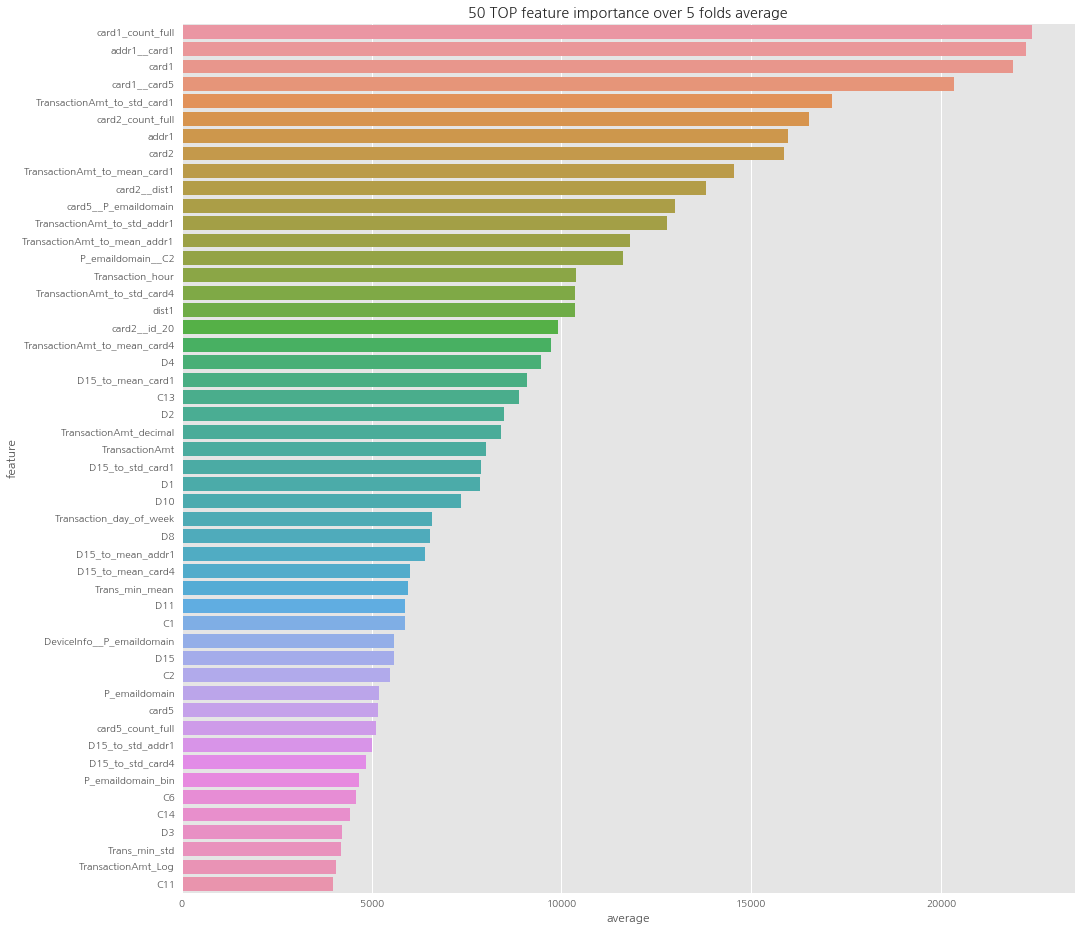

In [31]:
feature_importances['average'] = feature_importances[[f'fold_{fold_n + 1}' for fold_n in range(folds.n_splits)]].mean(axis=1)
feature_importances.to_csv('feature_importances.csv')

plt.figure(figsize=(16, 16))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature');
plt.title('50 TOP feature importance over {} folds average'.format(folds.n_splits));

In [14]:
a = pd.read_csv('submission-.9525.csv')
b = pd.read_csv('stack_gmean.csv')
c = pd.read_csv('submission3.csv')

In [26]:
d = pd.DataFrame()
d['TransactionID'] = b['TransactionID']

In [27]:
s1 = 0.9526
s2 = 0.9518

sum_s = s1 + s2

w1 = s1/sum_s
w2 = s2/sum_s

d['isFraud'] = w1*b['isFraud'] + w2*c['isFraud']

d.to_csv('submission2.csv',index=False)

In [13]:
c.to_csv('submission2.csv',index=False)

In [8]:
b

,TransactionID,isFraud
0,3663549,0.000702
1,3663550,0.001979
2,3663551,0.001268
3,3663552,0.001073
4,3663553,0.001737
5,3663554,0.002701
6,3663555,0.008491
7,3663556,0.010718
8,3663557,0.000384
9,3663558,0.004131


---
# PCA
---

In [8]:
df = train_transaction.iloc[:,55:]

In [10]:
def PCA_change(df, cols, n_components, prefix='PCA_', rand_seed=4):
    pca = PCA(n_components=n_components, random_state=rand_seed)

    principalComponents = pca.fit_transform(df[cols])

    principalDf = pd.DataFrame(principalComponents)

    df.drop(cols, axis=1, inplace=True)

    principalDf.rename(columns=lambda x: str(prefix)+str(x), inplace=True)

    df = pd.concat([df, principalDf], axis=1)
    
    return df

In [11]:
pca = PCA(n_components=30, random_state=4)

In [12]:
prin_com = principalComponents.tolist()

NameError: name 'principalComponents' is not defined

In [13]:
df = df.fillna((df.min() - 2))
df = (minmax_scale(df, feature_range=(0,1)))

In [14]:
principalComponents = pca.fit_transform(df)

In [18]:
'''각 행별 누적합계 구하기
최적의 주성분 개수구하기
n_components30으로 확인한 결과 주성분 9개로 데이터를 95% 설명할 수 있음
but 아래코드에서는 30개까지 사용'''
pca_r = np.cumsum(pca.explained_variance_ratio_)
pca_r

array([0.56259715, 0.73870146, 0.83014983, 0.87066498, 0.89432749,
       0.91457532, 0.93050307, 0.94333607, 0.95457889, 0.96145364,
       0.96451148, 0.96685058, 0.96885707, 0.97072851, 0.97239456,
       0.97385919, 0.97525694, 0.97656724, 0.97781668, 0.97899558,
       0.98006399, 0.98106482, 0.9819555 , 0.98278346, 0.98357483,
       0.98427135, 0.98493011, 0.98555807, 0.98614229, 0.98669845])

In [27]:
pca_r2 = (1- pd.Series(pca_r)).tolist()

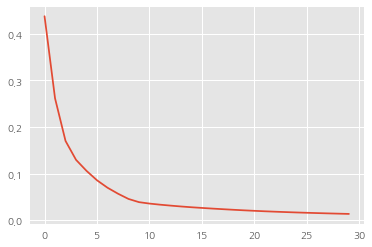

In [28]:
plt.plot(pca_r2)

In [38]:
df_test['isFraud'] = 'test'
df = pd.concat([df_train, df_test], axis=0, sort=False )
df = df.reset_index()
df = df.drop('index', axis=1)

In [41]:
'''V columns만 추출'''
mas_v = df_train.columns[55:394]

In [44]:
for col in mas_v:
    df[col] = df[col].fillna((df[col].min() - 2))
    df[col] = (minmax_scale(df[col], feature_range=(0,1)))

    
df = PCA_change(df, mas_v, prefix='PCA_V_', n_components=30)

In [45]:
df = reduce_mem_usage(df)

Mem. usage decreased to 267.88 Mb (76.3% reduction)


In [47]:
'''train과 test데이터 전체를 이용하여 주성분분석을 한 뒤 적절한 주성분의 개수를 구하고
다시 train과 test로 분할'''
df_train, df_test = df[df['isFraud'] != 'test'], df[df['isFraud'] == 'test'].drop('isFraud', axis=1)

---
# Modeling
---
- GPU모델링

In [48]:
'''x / y 변수 세팅'''

X_train = df_train.sort_values('TransactionDT').drop(['isFraud', 
                                                      'TransactionDT', 
                                                      #'Card_ID'
                                                     ],
                                                     axis=1)
y_train = df_train.sort_values('TransactionDT')['isFraud'].astype(bool)

X_test = df_test.sort_values('TransactionDT').drop(['TransactionDT',
                                                    #'Card_ID'
                                                   ], 
                                                   axis=1)
df_test = df_test[["TransactionDT"]]

In [61]:
class XgbWrapper(object):
    #__init__는 객체에서 처음 받을 인자값을 선언한다.
    def __init__(self, clf ,seed=0, params=None):
        params['feature_fraction_seed'] = seed
        params['bagging_seed'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict_proba(x)[:,1]

In [66]:
xgb_params = {
    'seed': 0,
    'class_weight' : 'balanced',
    'colsample_bytree': 0.7463058454739352,
    'gamma':0.6665437467229817,
    'silent': 1,
    'subsample': 0.7,
    'learning_rate': 0.013887824598276186,
    'objective': 'binary:logistic',
    'max_depth':4,
    'num_parallel_tree': 1,
    'min_child_weight': 1,
    'min_child_samples': 170, 
    'num_leaves': 220, 
    'reg_alpha': 0.39871702770778467,
    'nrounds': 200
}


In [67]:
xg = XgbWrapper(clf=xgb.XGBClassifier, params=xgb_params)

In [68]:
xg.train(X_train,y_train)

In [70]:
ts = xg.predict(X_test) #xgb

In [80]:
y_train.value_counts()

False    569877
True      20663
Name: isFraud, dtype: int64

In [77]:
ts.tolist()

[0.13360252976417542,
 0.1357370913028717,
 0.1357370913028717,
 0.13378329575061798,
 0.14806373417377472,
 0.13360252976417542,
 0.14848090708255768,
 0.13582226634025574,
 0.13360252976417542,
 0.1357370913028717,
 0.13360252976417542,
 0.13360252976417542,
 0.13735800981521606,
 0.13360252976417542,
 0.1357370913028717,
 0.13360252976417542,
 0.14616961777210236,
 0.14516863226890564,
 0.17428801953792572,
 0.1357370913028717,
 0.1482836902141571,
 0.13360252976417542,
 0.1357370913028717,
 0.15002839267253876,
 0.17428801953792572,
 0.15022753179073334,
 0.14995400607585907,
 0.1463206559419632,
 0.15002839267253876,
 0.1357370913028717,
 0.17439253628253937,
 0.1357370913028717,
 0.17539657652378082,
 0.15022753179073334,
 0.13360252976417542,
 0.13520193099975586,
 0.13582226634025574,
 0.28808319568634033,
 0.1749059557914734,
 0.17907413840293884,
 0.1749059557914734,
 0.13509903848171234,
 0.13510577380657196,
 0.14995400607585907,
 0.1518450528383255,
 0.15215542912483215,
 

In [ ]:
[fpr, tpr, thr] = metrics.roc_curve(y_test, ts)

In [ ]:
auc = metrics.auc(fpr, tpr)

In [ ]:
print('xgboost 모델 auc면적 : ' , auc)

In [74]:
feature_important =xg.get_booster().get_score(importance_type="weight")

AttributeError: 'XgbWrapper' object has no attribute 'get_booster'

In [55]:
tss = TimeSeriesSplit(n_splits=7)

In [59]:
def objective(params):
    time1 = time.time()
    params = {
        'max_depth': int(params['max_depth']),
        'gamma': "{:.3f}".format(params['gamma']),
        'subsample': "{:.2f}".format(params['subsample']),
        'reg_alpha': "{:.3f}".format(params['reg_alpha']),
        'reg_lambda': "{:.3f}".format(params['reg_lambda']),
        'learning_rate': "{:.3f}".format(params['learning_rate']),
        'num_leaves': '{:.3f}'.format(params['num_leaves']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
        'min_child_samples': '{:.3f}'.format(params['min_child_samples']),
        'feature_fraction': '{:.3f}'.format(params['feature_fraction']),
        'bagging_fraction': '{:.3f}'.format(params['bagging_fraction'])
    }

    print("\n############## New Run ################")
    print(f"params = {params}")
    FOLDS = 7
    count=1
    skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=42)

    tss = TimeSeriesSplit(n_splits=FOLDS)
    y_preds = np.zeros(sample_submission.shape[0])
    y_oof = np.zeros(X_train.shape[0])
    score_mean = 0
    for tr_idx, val_idx in tss.split(X_train, y_train):
        clf = xgb.XGBClassifier(
            n_estimators=600, random_state=4, verbose=True, 
            **params
        )

        X_tr, X_vl = X_train.iloc[tr_idx, :], X_train.iloc[val_idx, :]
        y_tr, y_vl = y_train.iloc[tr_idx], y_train.iloc[val_idx]
        
        clf.fit(X_tr, y_tr)
        #y_pred_train = clf.predict_proba(X_vl)[:,1]
        #print(y_pred_train)
        score = make_scorer(roc_auc_score, needs_proba=True)(clf, X_vl, y_vl)
        # plt.show()
        score_mean += score
        print(f'{count} CV - score: {round(score, 4)}')
        count += 1
    time2 = time.time() - time1
    print(f"Total Time Run: {round(time2 / 60,2)}")
    gc.collect()
    print(f'Mean ROC_AUC: {score_mean / FOLDS}')
    del X_tr, X_vl, y_tr, y_vl, clf, score
    return -(score_mean / FOLDS)


space = {
    # The maximum depth of a tree, same as GBM.
    # Used to control over-fitting as higher depth will allow model 
    # to learn relations very specific to a particular sample.
    # Should be tuned using CV.
    # Typical values: 3-10
    'max_depth': hp.quniform('max_depth', 7, 23, 1),
    
    # reg_alpha: L1 regularization term. L1 regularization encourages sparsity 
    # (meaning pulling weights to 0). It can be more useful when the objective
    # is logistic regression since you might need help with feature selection.
    'reg_alpha':  hp.uniform('reg_alpha', 0.01, 0.4),
    
    # reg_lambda: L2 regularization term. L2 encourages smaller weights, this
    # approach can be more useful in tree-models where zeroing 
    # features might not make much sense.
    'reg_lambda': hp.uniform('reg_lambda', 0.01, .4),
    
    # eta: Analogous to learning rate in GBM
    # Makes the model more robust by shrinking the weights on each step
    # Typical final values to be used: 0.01-0.2
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    
    # colsample_bytree: Similar to max_features in GBM. Denotes the 
    # fraction of columns to be randomly samples for each tree.
    # Typical values: 0.5-1
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, .9),
    
    # A node is split only when the resulting split gives a positive
    # reduction in the loss function. Gamma specifies the 
    # minimum loss reduction required to make a split.
    # Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.
    'gamma': hp.uniform('gamma', 0.01, .7),
    
    # more increases accuracy, but may lead to overfitting.
    # num_leaves: the number of leaf nodes to use. Having a large number 
    # of leaves will improve accuracy, but will also lead to overfitting.
    'num_leaves': hp.choice('num_leaves', list(range(20, 250, 10))),
    
    # specifies the minimum samples per leaf node.
    # the minimum number of samples (data) to group into a leaf. 
    # The parameter can greatly assist with overfitting: larger sample
    # sizes per leaf will reduce overfitting (but may lead to under-fitting).
    'min_child_samples': hp.choice('min_child_samples', list(range(100, 250, 10))),
    
    # subsample: represents a fraction of the rows (observations) to be 
    # considered when building each subtree. Tianqi Chen and Carlos Guestrin
    # in their paper A Scalable Tree Boosting System recommend 
    'subsample': hp.choice('subsample', [0.2, 0.4, 0.5, 0.6, 0.7, .8, .9]),
    
    # randomly select a fraction of the features.
    # feature_fraction: controls the subsampling of features used
    # for training (as opposed to subsampling the actual training data in 
    # the case of bagging). Smaller fractions reduce overfitting.
    'feature_fraction': hp.uniform('feature_fraction', 0.4, .8),
    
    # randomly bag or subsample training data.
    'bagging_fraction': hp.uniform('bagging_fraction', 0.4, .9)
    
    # bagging_fraction and bagging_freq: enables bagging (subsampling) 
    # of the training data. Both values need to be set for bagging to be used.
    # The frequency controls how often (iteration) bagging is used. Smaller
    # fractions and frequencies reduce overfitting.
}

In [60]:
# Set algoritm parameters
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=27)

# Print best parameters
best_params = space_eval(space, best)

                                                                                                                       
############## New Run ################
params = {'max_depth': 12, 'gamma': '0.540', 'subsample': '0.80', 'reg_alpha': '0.196', 'reg_lambda': '0.044', 'learning_rate': '0.054', 'num_leaves': '110.000', 'colsample_bytree': '0.892', 'min_child_samples': '230.000', 'feature_fraction': '0.493', 'bagging_fraction': '0.863'}
  0%|                                                                             | 0/27 [04:49<?, ?it/s, best loss: ?]


KeyboardInterrupt: 